In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential


import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
cifar10 = keras.datasets.cifar10

In [3]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = train_images/255.0
test_images = test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


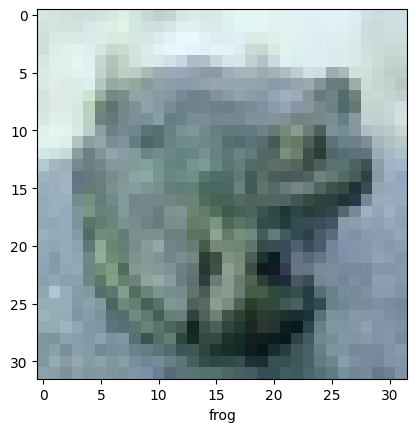

In [7]:
idx= random.randint(0,len(train_images))
img = train_images[idx,:]
# img = img * 255.0
plt.imshow(img)
plt.xlabel(class_names[train_labels[idx][0]])
plt.show()

In [10]:
models = keras.models.Sequential()
models.add(Conv2D(32, (3,3), activation = 'relu', strides= (1,1), padding="valid", input_shape = (32, 32, 3)))
models.add(MaxPooling2D((2,2)))
models.add(Conv2D(32, (3,3), activation = 'relu'))
models.add(MaxPooling2D((2,2)))
models.add(Flatten())
models.add(Dense(64, activation = 'relu'))
models.add(Dense(10))

print(models.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,586 (330.41 KB)

 Trainable params: 84,586 (330.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

models.compile( loss = loss, optimizer = 'adam', metrics = ['accuracy'])

In [14]:
models.fit( train_images, train_labels, epochs = 10, batch_size= 128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7364 - loss: 0.7523
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7469 - loss: 0.7295
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7506 - loss: 0.7160
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7526 - loss: 0.7094
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7559 - loss: 0.6964
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7658 - loss: 0.6716
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7700 - loss: 0.6662
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7723 - loss: 0.6548
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7759 - loss: 0.6446
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7789 - loss: 0.6315


In [16]:
models.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6876 - loss: 0.9360


[0.9440068006515503, 0.6862000226974487]